<a href="https://colab.research.google.com/github/A01749373/PortafolioImplementacionM2/blob/main/PortafolioImplementacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
'''
Ariadna Jocelyn Guzmán Jiménez A01749373
27-08-2022
"Implementación de refinamiento de modelos"
'''

'\nAriadna Jocelyn Guzmán Jiménez A01749373\n27-08-2022\n"Implementación de refinamiento de modelos"\n'

# Lectura de datos

In [151]:
# Librerias 

import pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns


In [152]:
# Importación de datos 

df = pd.read_csv("Fish.csv")

df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


# Entendimiento de los datos

In [153]:
# Numero de filas y columnas    
df.shape

(159, 7)

In [154]:
# Informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [155]:
# Análisis estadístico
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


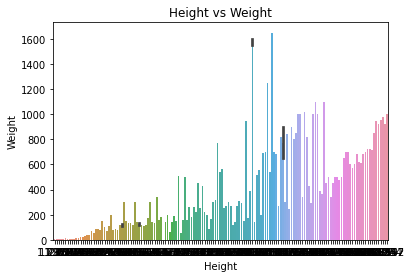

In [156]:
# Visualización de datos

# Height vs Weight
sns.barplot(data=df, x="Height", y="Weight")
plt.title("Height vs Weight")
plt.show()

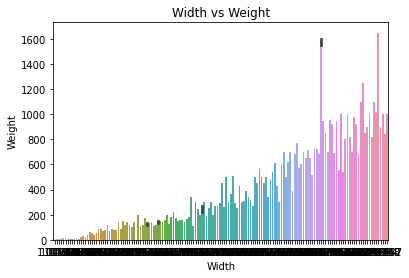

In [157]:
# Width vs Weight
sns.barplot(data=df, x="Width", y="Weight")
plt.title("Width vs Weight")
plt.show()

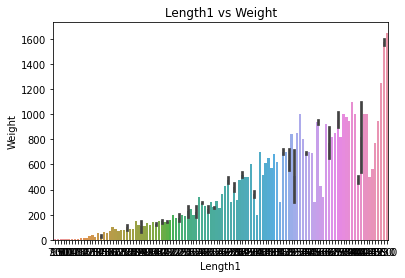

In [158]:
# Length1 vs Weight
sns.barplot(data=df, x="Length1", y="Weight")
plt.title("Length1 vs Weight")
plt.show()

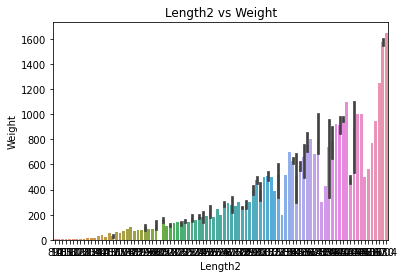

In [159]:
# Length2 vs Weight
sns.barplot(data=df, x="Length2", y="Weight")
plt.title("Length2 vs Weight")
plt.show()

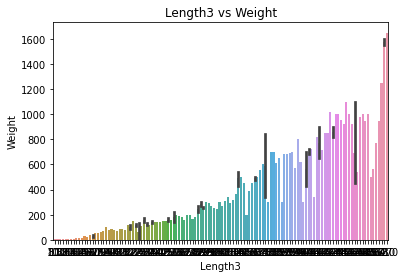

In [160]:
# Length3 vs Weight
sns.barplot(data=df, x="Length3", y="Weight")
plt.title("Length3 vs Weight")
plt.show()

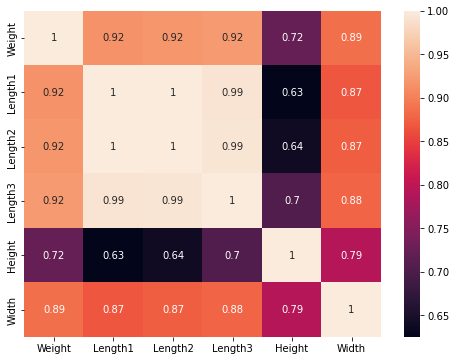

In [161]:
# Matriz de correlacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()


# Tratamiento de los datos

In [162]:
# Checar la existencia de datos nulos
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [163]:
# Separacion en X y Y
x= df["Width"]

y= df["Weight"]


In [245]:
# Dividir el dataset 
from sklearn.model_selection import train_test_split

# Modelo prueba 20% y entrenamiento 80%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)


# Pruebas

*Se va cambiando el número de iteraciones entre cada una de las funciones*

In [247]:
theta = [1,1]
alpha = 0.0001

def h0(x, theta):
  '''
  Calculo de la funcion de hipotesis
  '''
  return theta[0] + theta[1] * x


def accuracy(estimated, prediction):
  '''
  Calculo del score de precisión del modelo
  '''
  correlation_matrix = np.corrcoef(estimated, prediction)
  correlation = correlation_matrix[0,1]
  r_squared = correlation**2
  return(r_squared)


def linearRegression(x, y, iterations, theta, alpha):
  '''
  Funcion que realiza el metodo de regresion lineal
  con gradiente descendiente
  '''
  n = len(x)

  i = iterations
  while (i != 0):

    all_h0 = []
    delta = []
    deltaX = []
    all_x = []

    for xi, yi in zip(x,y):
      all_x.append(xi)
      all_h0.append(h0(xi, theta)) #h0
      delta.append(h0(xi, theta) - yi)  #h0-y
      deltaX.append((h0(xi, theta) - yi) * xi) #(h0-y) * x
    i -=1 
    # Refinamiento de theta
    theta[0] = theta[0] - alpha/n * sum(delta)
    theta[1] = theta[1] - alpha/n * sum(deltaX)

  score = accuracy(y, all_h0)
  print("Predicción\n", all_h0)
  print("\nDelta\n", delta)
  print("\nDeltaX\n", deltaX)
  print("\nTheta actualizada después de {} iteraciones \n".format(iterations), theta)
  print("\nScore\n", score)
  print("\n")
  plt.plot(x, all_h0, color="#C6E5B1")
  plt.scatter(x,y,marker=".", color="#F7D917")
  plt.title("Width vs Weight")
  plt.xlabel("Width")
  plt.ylabel("Weight")
  plt.show()
  return all_h0
  

Predicción
 [505.10734570790993, 469.09901058862874, 621.6721522439598, 193.47916441332407, 119.57359752300471, 461.59313178822634, 296.6328047219001, 367.9734487903601, 415.65317690523386, 502.1646435556992, 122.49641655256534, 449.703024443483, 108.89636065991579, 110.04958177361999, 322.2422666951934, 355.606146502015, 355.2084840490136, 98.87526684427925, 689.1355873956556, 732.043366074512, 653.852986253102, 405.0355894100952, 408.8730320815592, 355.00965282251286, 284.83217142908205, 725.5714096519134, 412.6905916303731, 358.9465111072272, 355.7254452379155, 376.00623034098936, 499.0429932996378, 478.88150693246433, 604.2048289958711, 769.7417666190495, 548.4227284010927, 549.4665923402216, 305.2421968293815, 441.77960006742916, 287.15849677914053, 437.6737352401891, 181.5492908232806, 438.02168988656535, 519.4927849452373, 308.59250299591866, 256.3495982328533, 359.3342319989036, 677.1162397536868, 428.97486908078247, 736.6065427227036, 508.7857233981733, 677.5536684519884, 355.

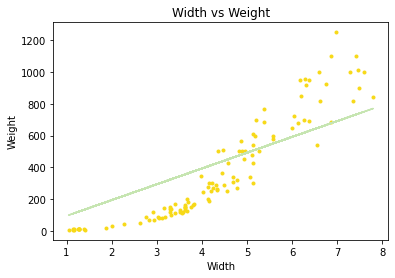

In [253]:
prediction1 = linearRegression(x_train, y_train, 1000, theta, alpha)

Predicción
 [506.66113845651205, 467.33183791788474, 633.9764473508811, 166.29221115562564, 85.57050485961372, 459.1337092854542, 278.9594729968174, 356.87969957472717, 408.956818675571, 503.44703769465843, 88.76288872442771, 446.14700485580255, 73.90853114937471, 75.16811117766866, 306.93083638375936, 343.3717896161263, 342.9374516753353, 62.96321504144089, 707.6618790060784, 754.5269428174299, 669.1252452093947, 397.3599956564507, 401.55135678508407, 342.7202827049398, 266.0704946038437, 747.458092831056, 405.7210010166779, 347.02022831877093, 343.50209099836366, 365.6533259787059, 500.0374848594489, 478.0165512613439, 614.8981533016354, 795.702179604419, 553.9713986571743, 555.1115357517508, 288.3628894149431, 437.4928213855414, 268.6113715574712, 433.008282146874, 153.2620729318949, 433.3883278450661, 522.3733134646274, 292.02218656610745, 234.9610395946866, 347.4437078110422, 694.5340147456697, 423.5071396920704, 759.5109706880069, 510.678764408829, 695.0117864805399, 342.72028270

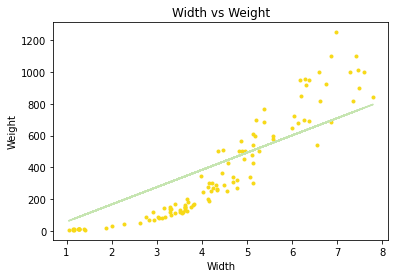

In [254]:
prediction2 = linearRegression(x_train, y_train, 10000, theta, alpha)

Predicción
 [514.7570696992353, 458.0525189394409, 698.3188746850416, 24.016912847629328, -92.36675097023706, 446.2325477015489, 186.4593255156655, 298.803846844292, 373.8880614892324, 510.12301475033985, -87.7640072034288, 427.50846081344446, -109.18085575102646, -107.36480718997288, 226.78812804389042, 279.3282915860964, 278.70206794435376, -124.96169152294055, 804.5577155066773, 872.1272464507064, 748.9960228930632, 357.1678902547044, 363.2109483975207, 278.38895612348256, 167.87613894695318, 861.935456681345, 369.2226953582499, 284.5885701767345, 279.51615867861926, 311.453564407493, 505.20715916266033, 473.45762052630937, 670.8120012214969, 931.493247687907, 582.9684798760504, 584.6123169356248, 200.01706735939337, 415.0309547517228, 171.53954725114755, 408.56519565073006, 5.230203595350645, 409.1131413372549, 537.4107099392747, 205.2930015410749, 123.02287060713792, 285.19913822743354, 785.6301059350066, 394.8665534876103, 879.3131627397028, 520.5496383853546, 786.3189519409235, 

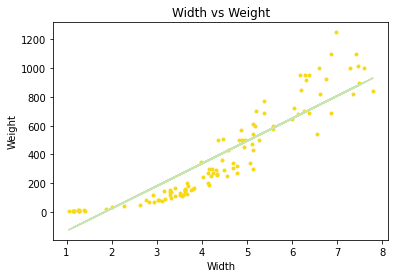

In [255]:
prediction3 = linearRegression(x_train, y_train, 100000, theta, alpha)

# Predicción

Predicción
 [464.45932919525694, 175.05376898129907, 255.79497951917403, 276.4019355027292, 831.5139753871226, 1012.6086830075569, 871.7548411640335, 319.54031660156704, 909.3144241057284, 165.51791631734557, 180.24334866236234, 384.9938903289766, 861.2459423098805, 1210.8938733215134, -49.265812732657594, 78.35460092415485, 217.47858287399083, 778.8613648730022, 214.49457455737945, 767.1848105906099, -46.606153146112774, 608.2539328580497, 187.14116498844226, 1067.7479671188537, 28.318403499237206, 497.71588565140337, 658.8523347484158, 368.9926863123651, 986.9635100836365, -251.2702018180426, 688.8221574065558, 314.17775093113505, 778.8613648730022, 398.37868125638545, 593.2041517829664, 255.3625145457521, 452.653035420838, 592.0581196033982, 907.908912942107, 212.54848217698077, 751.6160715474205, -23.793625798105722, 277.4182281902707, 715.6133625100445, -102.67523695026631, 366.9384776886109, 294.9330596138591, 346.3963914510691]

Delta
 [74.45932919525694, 175.05376898129907, 85.

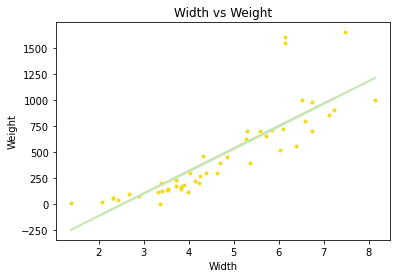

In [257]:
# Con más iteraciones, mayor la puntación de veracidad que tenemos en el modelo, sin embargo, no cambia por mucho
# Se usa el último para las predicciones y comparación de entrada
prediction4 = linearRegression(x_test, y_test, 100000, theta, alpha)


## Comparación real vs predicción

In [260]:
comp = pd.DataFrame(x_test)
comp["Prediction"] = prediction4
comp["Estimated"] = y_test
comp

,Width,Prediction,Estimated
7,4.6900,464.459329,390.0
40,3.3516,175.053769,0.0
95,3.7250,255.794980,170.0
45,3.8203,276.401936,160.0
110,6.3875,831.513975,556.0
120,7.2250,1012.608683,900.0
59,6.5736,871.754841,800.0
131,4.0198,319.540317,300.0
33,6.7473,909.314424,975.0
83,3.3075,165.517916,115.0


# Comparación con librerías de sklearn

In [169]:
# Separacion en X y Y
xSK= df[["Width"]]

ySK= df["Weight"]


## Train

In [170]:
# Modelo prueba 30% y entrenamiento 70%
x_trainSK, x_testSK, y_trainSK, y_testSK = train_test_split(xSK, ySK, test_size = 0.3, random_state = 0)

In [171]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_trainSK,y_trainSK)


LinearRegression()

## Test

In [241]:
print("Linear regression Training Accuracy:",lr.score(x_trainSK, y_trainSK))

Linear regression Training Accuracy: 0.8457594824524043


In [242]:
lr.fit(x_testSK, y_testSK)
print("Linear regression Training Accuracy:",lr.score(x_testSK, y_testSK))

Linear regression Training Accuracy: 0.7241436644225308
